# Data Cleaning and Preprocessing #

## Loading the Dataset

In [1]:
# Importing Pandas library for loading the dataset
import pandas as pd
df = pd.read_csv('Car.csv')

# Printing initial values to check the correct loading of the dataset
df.head()

,OBJECTID,Bay_ID,Street,Suburb,Operator,Status,Date,Year,Month,Hours_Available,Hours_Booked,No_Bookings,Trip_Distance
0,1,17.0,Manning Street,Potts Point,GoGet,Installed,2019-10,2019,10.0,724.0,91.0,29.0,747.0
1,2,17.0,Manning Street,Potts Point,GoGet,Installed,2019-11,2019,11.0,719.0,148.0,36.0,948.0
2,3,17.0,Manning Street,Potts Point,GoGet,Installed,2019-12,2019,12.0,743.0,205.0,53.0,1167.0
3,4,18.0,Liverpool Street,Darlinghurst,GoGet,Installed,2019-01,2019,1.0,743.0,71.0,22.0,409.0
4,5,18.0,Liverpool Street,Darlinghurst,GoGet,Installed,2019-02,2019,2.0,668.0,68.0,22.0,445.0


In [3]:
# Printing terminal values to check the correct loading of the dataset
df.tail()

,OBJECTID,Bay_ID,Street,Suburb,Operator,Status,Date,Year,Month,Hours_Available,Hours_Booked,No_Bookings,Trip_Distance
39394,39395,17.0,Manning Street,Potts Point,GoGet,Installed,2019-05,2019,5.0,726.0,102.0,31.0,818.0
39395,39396,17.0,Manning Street,Potts Point,GoGet,Installed,2019-06,2019,6.0,720.0,165.0,48.0,1602.0
39396,39397,17.0,Manning Street,Potts Point,GoGet,Installed,2019-07,2019,7.0,744.0,118.0,37.0,1479.0
39397,39398,17.0,Manning Street,Potts Point,GoGet,Installed,2019-08,2019,8.0,742.0,160.0,38.0,1192.0
39398,39399,17.0,Manning Street,Potts Point,GoGet,Installed,2019-09,2019,9.0,684.0,116.0,21.0,842.0


## Identifying missing values

In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Bay_ID               2
Status               1
Date                 2
Month                2
Hours_Available    644
Hours_Booked       615
No_Bookings        471
Trip_Distance      595
dtype: int64


## Handling missing values

In [9]:
# Replacing/ Filling NaN values with 0 for the entire Dataset
data_filled = df.fillna(0)

# Replacing/ Filling NaN values for numeric columns with the mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Replacing/ Filling NaN values for non-numeric columns with a placeholder like "Unknown"
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
df[non_numeric_columns] = df[non_numeric_columns].fillna('Unknown')

# Dropping rows with NaN values
data_cleaned = df.dropna()

## Identifying Redundancy

In [12]:
# Checking for duplicate rows across the datset
duplicates = df.duplicated()

# Showcasing the number of duplicates across the dataset
print(f"Number of duplicate rows: {duplicates.sum()}")

# Eliminating redundancy across the dataset
data_cleaned = df.drop_duplicates()

Number of duplicate rows: 0


## Identification and conversion of dataset

In [15]:
# Printing the data types of each column
print(df.dtypes)

# Converting 'Date' to datetime and coercing invalid entries to NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Inspecting any NaT values
print(df['Date'].isnull().sum())

# Dropping rows with NaT values in 'Date'
df_cleaned = df.dropna(subset=['Date'])

# Replacing/ Filling NaT values with a specific date
df['Date'] = df['Date'].fillna(pd.Timestamp('2019-05-01'))

# Checking the data type of the 'Date' column
print(df['Date'].dtypes)

# Displaying intial rows to ensure the conversion
print(df.head())

OBJECTID             int64
Bay_ID             float64
Street              object
Suburb              object
Operator            object
Status              object
Date                object
Year                 int64
Month              float64
Hours_Available    float64
Hours_Booked       float64
No_Bookings        float64
Trip_Distance      float64
dtype: object
2
datetime64[ns]
   OBJECTID  Bay_ID            Street        Suburb Operator     Status  \
0         1    17.0    Manning Street   Potts Point    GoGet  Installed   
1         2    17.0    Manning Street   Potts Point    GoGet  Installed   
2         3    17.0    Manning Street   Potts Point    GoGet  Installed   
3         4    18.0  Liverpool Street  Darlinghurst    GoGet  Installed   
4         5    18.0  Liverpool Street  Darlinghurst    GoGet  Installed   

        Date  Year  Month  Hours_Available  Hours_Booked  No_Bookings  \
0 2019-10-01  2019   10.0            724.0          91.0         29.0   
1 2019-11-01  2019   

## Checkpoint

In [18]:
# Saving the cleaned data to a new Excel/ CSV file
data_cleaned.to_csv('cleaned_car.csv', index=False)

In [20]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned dataset
df = pd.read_csv('cleaned_car.csv')
print(df.head())

   OBJECTID  Bay_ID            Street        Suburb Operator     Status  \
0         1    17.0    Manning Street   Potts Point    GoGet  Installed   
1         2    17.0    Manning Street   Potts Point    GoGet  Installed   
2         3    17.0    Manning Street   Potts Point    GoGet  Installed   
3         4    18.0  Liverpool Street  Darlinghurst    GoGet  Installed   
4         5    18.0  Liverpool Street  Darlinghurst    GoGet  Installed   

      Date  Year  Month  Hours_Available  Hours_Booked  No_Bookings  \
0  2019-10  2019   10.0            724.0          91.0         29.0   
1  2019-11  2019   11.0            719.0         148.0         36.0   
2  2019-12  2019   12.0            743.0         205.0         53.0   
3  2019-01  2019    1.0            743.0          71.0         22.0   
4  2019-02  2019    2.0            668.0          68.0         22.0   

   Trip_Distance  
0          747.0  
1          948.0  
2         1167.0  
3          409.0  
4          445.0  


In [22]:
# Displaying the basic statistics of the dataset
print(df.columns)

Index(['OBJECTID', 'Bay_ID', 'Street', 'Suburb', 'Operator', 'Status', 'Date',
       'Year', 'Month', 'Hours_Available', 'Hours_Booked', 'No_Bookings',
       'Trip_Distance'],
      dtype='object')


# Exploratory Data Analysis (EDA)

In [25]:
# Importing required libraries for various analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df = df.dropna()

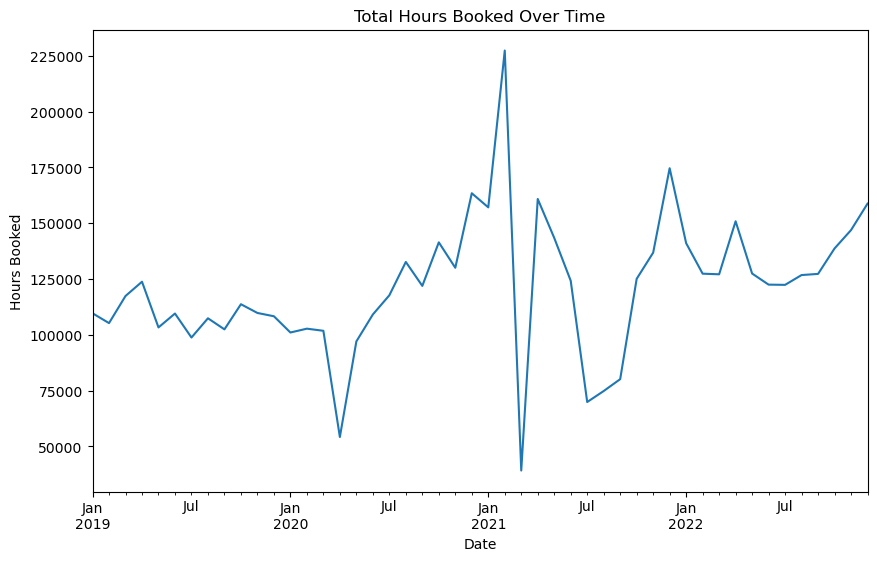

In [27]:
# Plotting of Date vs Hours_Booked
plt.figure(figsize=(10, 6))
df.groupby('Date').sum()['Hours_Booked'].plot()
plt.title('Total Hours Booked Over Time')
plt.xlabel('Date')
plt.ylabel('Hours Booked')
plt.show()

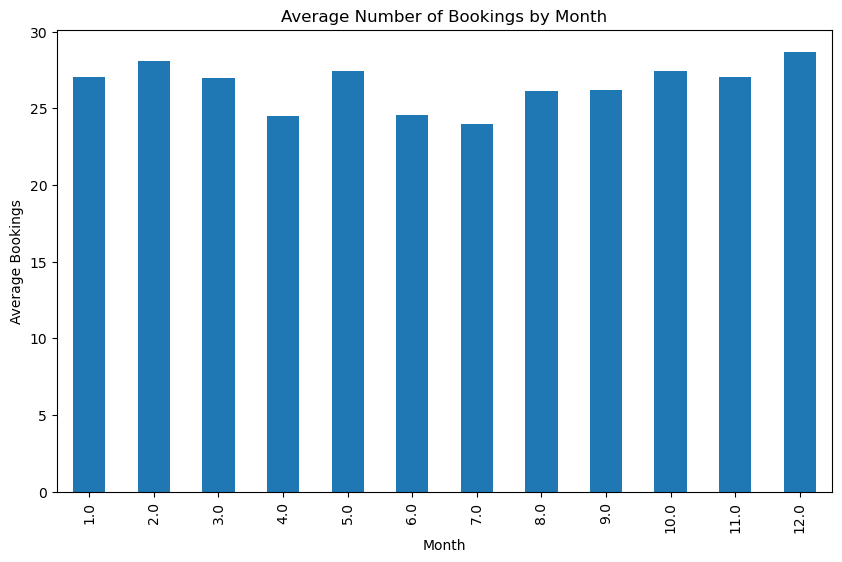

In [31]:
# Plotting of Month vs Average Bookings
plt.figure(figsize=(10, 6))
df.groupby('Month').mean(numeric_only=True)['No_Bookings'].plot(kind='bar')
plt.title('Average Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Average Bookings')
plt.show()

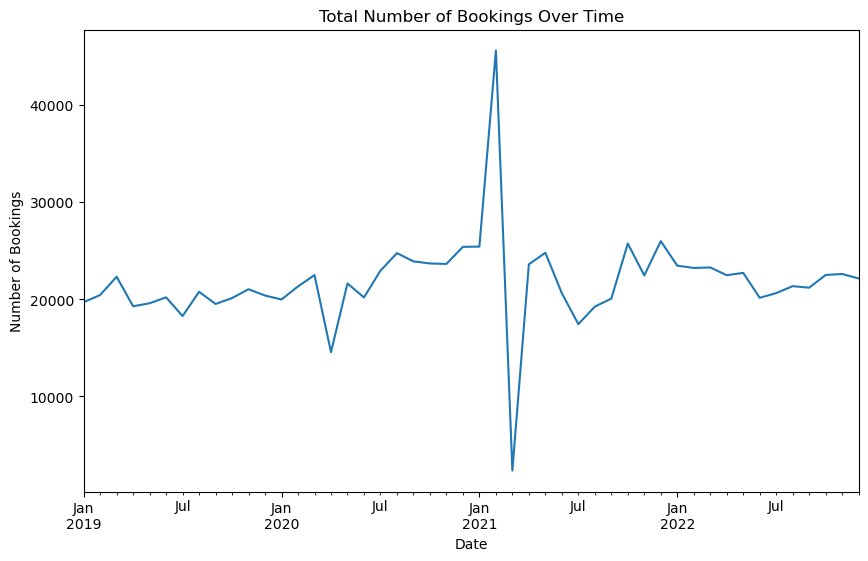

In [29]:
# Plotting of Date vs Number of Bookings
plt.figure(figsize=(10, 6))
df.groupby('Date').sum()['No_Bookings'].plot()
plt.title('Total Number of Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()

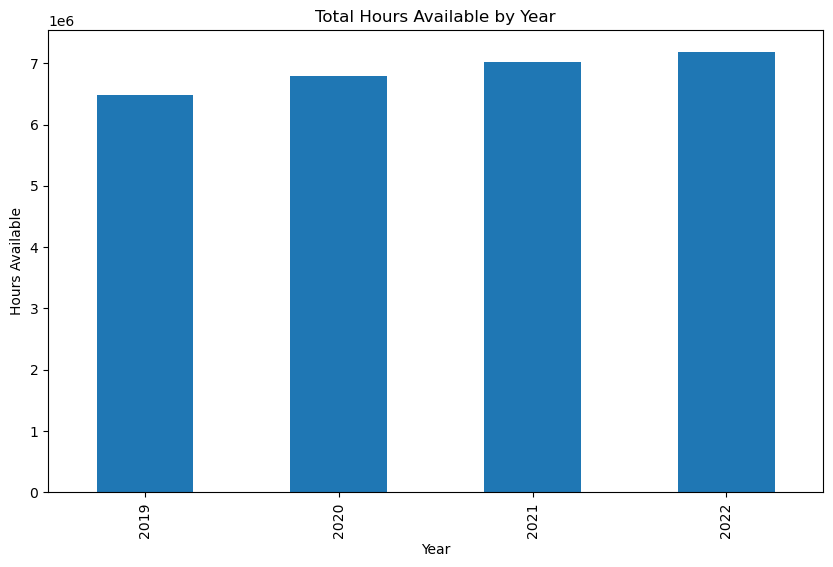

In [47]:
# Groupping 'Year' and sum only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Plotting of the 'Hours_Available' for each year
plt.figure(figsize=(10, 6))
df_numeric.groupby(df['Year']).sum()['Hours_Available'].plot(kind='bar')
plt.title('Total Hours Available by Year')
plt.xlabel('Year')
plt.ylabel('Hours Available')
plt.show()

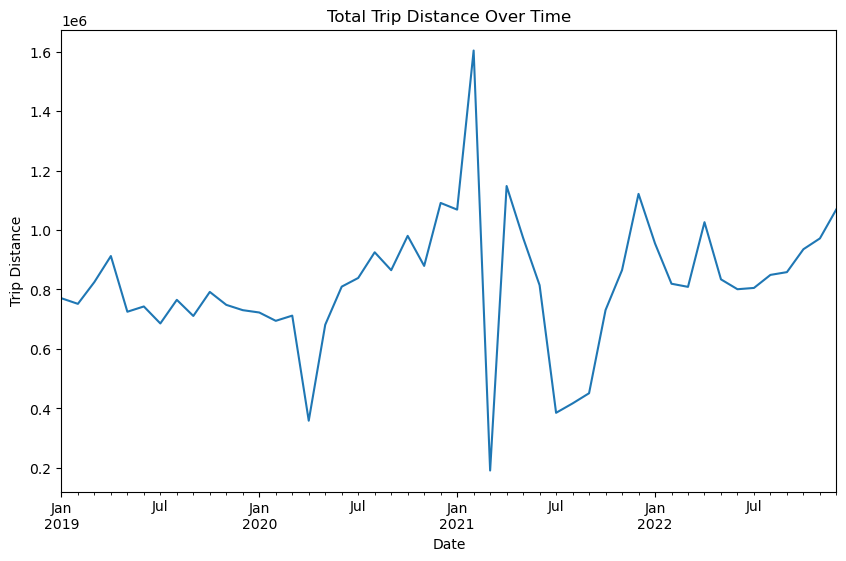

In [39]:
# Plotting of Trip Distance vs Date
plt.figure(figsize=(10, 6))
df.groupby('Date').sum()['Trip_Distance'].plot(kind='line')
plt.title('Total Trip Distance Over Time')
plt.xlabel('Date')
plt.ylabel('Trip Distance')
plt.show()

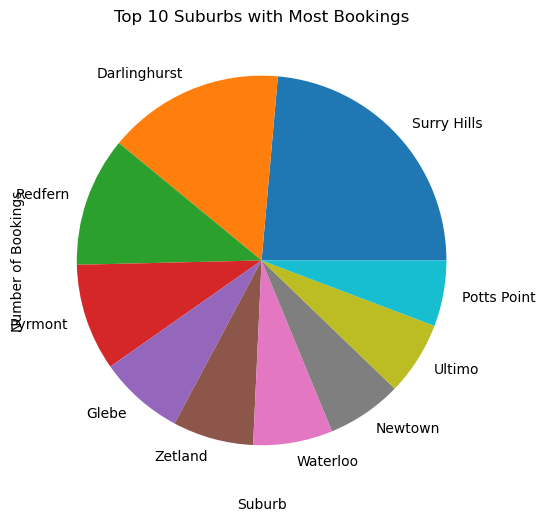

In [45]:
# Plotting of Suburbs vs Number of Bookings 
plt.figure(figsize=(10, 6))
df['Suburb'].value_counts().head(10).plot(kind='pie')
plt.title('Top 10 Suburbs with Most Bookings')
plt.xlabel('Suburb')
plt.ylabel('Number of Bookings')
plt.show()

0
['Potts Point' 'Darlinghurst' 'Surry Hills' 'Rushcutters Bay' 'Pyrmont'
 'Ultimo' 'Chippendale' 'Woolloomooloo' 'Glebe' 'Haymarket'
 'Millers Point' 'Paddington' 'Camperdown' 'Darlington' 'Newtown'
 'Redfern' 'Sydney' 'Waterloo' 'Zetland' 'Erskineville' 'Forest Lodge'
 'Elizabeth Bay' 'Alexandria' 'Dawes Point' 'Eveleigh' 'The Rocks'
 'Rosebery' 'Centennial Park' 'Moore Park' 'Beaconsfield' 'Barangaroo']
0
float64
   OBJECTID  Bay_ID            Street        Suburb Operator     Status  \
0         1    17.0    Manning Street   Potts Point    GoGet  Installed   
1         2    17.0    Manning Street   Potts Point    GoGet  Installed   
2         3    17.0    Manning Street   Potts Point    GoGet  Installed   
3         4    18.0  Liverpool Street  Darlinghurst    GoGet  Installed   
4         5    18.0  Liverpool Street  Darlinghurst    GoGet  Installed   

        Date  Year  Month  Hours_Available  Hours_Booked  No_Bookings  \
0 2019-10-01  2019   10.0            724.0          91.0

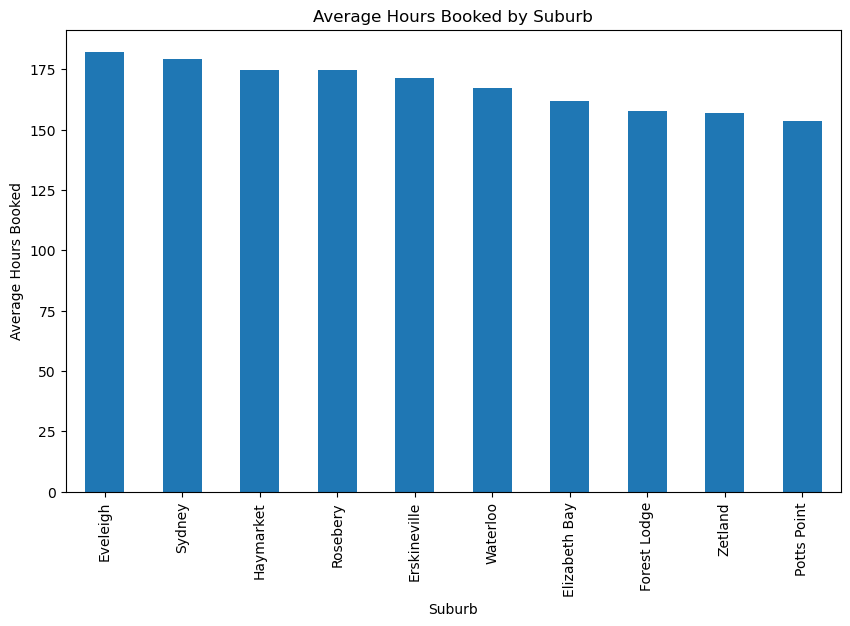

In [49]:
# Checking for any missing or unexpected values in 'Suburb'
print(df['Suburb'].isnull().sum())  # Check for missing values in 'Suburb'
print(df['Suburb'].unique())  # Print unique values in 'Suburb'

# Checking for missing values and data types in 'Hours_Booked'
print(df['Hours_Booked'].isnull().sum())  # Check for missing values
print(df['Hours_Booked'].dtype)  # Check data type

# Dropping rows where 'Suburb' is NaN
df_cleaned = df.dropna(subset=['Suburb'])

# Converting 'Hours_Booked' to numeric and coerce errors
df_cleaned['Hours_Booked'] = pd.to_numeric(df_cleaned['Hours_Booked'], errors='coerce')
print(df_cleaned.head())

# Dropping rows with NaN values in 'Hours_Booked'
df_cleaned = df_cleaned.dropna(subset=['Hours_Booked'])

# Plotting Suburbs vs Average Hours Booked
plt.figure(figsize=(10, 6))
df_cleaned.groupby('Suburb').mean(numeric_only=True)['Hours_Booked'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Hours Booked by Suburb')
plt.xlabel('Suburb')
plt.ylabel('Average Hours Booked')
plt.show()

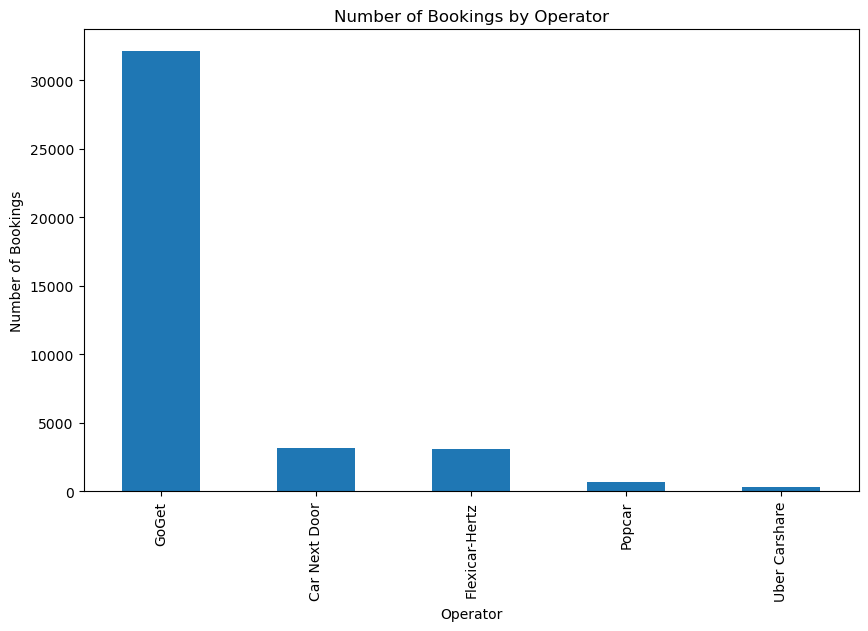

In [51]:
# Plotting of Operator vs Number of Bookings
plt.figure(figsize=(10, 6))
df['Operator'].value_counts().plot(kind='bar')
plt.title('Number of Bookings by Operator')
plt.xlabel('Operator')
plt.ylabel('Number of Bookings')
plt.show()

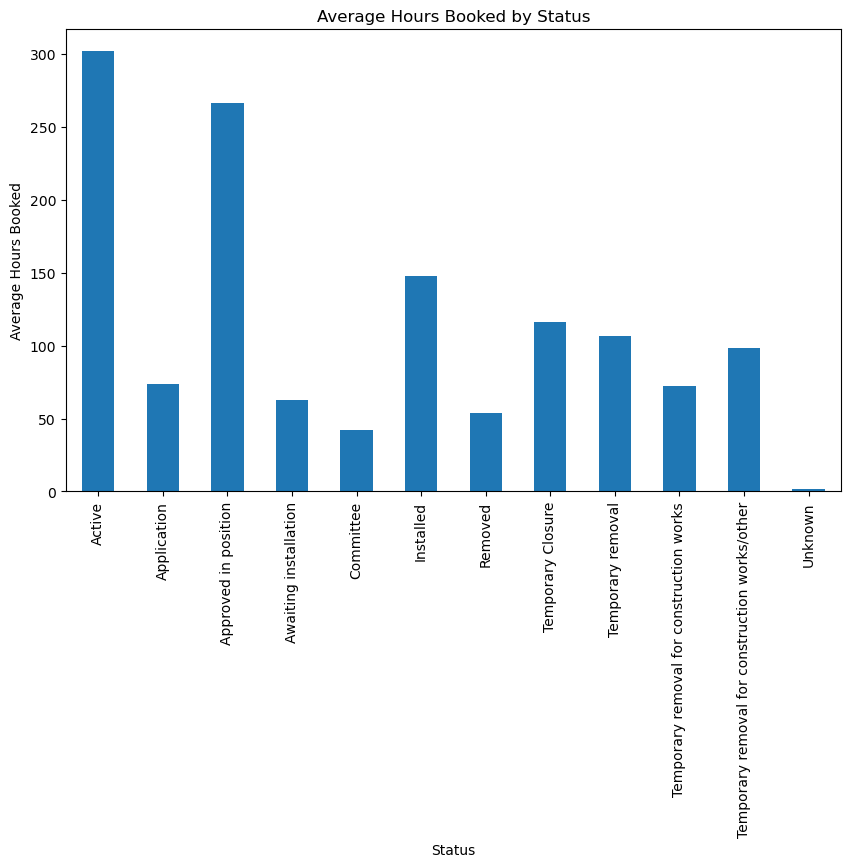

In [53]:
# Plotting of Status vs Average Hours Booked
plt.figure(figsize=(10, 6))
df.groupby('Status').mean(numeric_only=True)['Hours_Booked'].plot(kind='bar')
plt.title('Average Hours Booked by Status')
plt.xlabel('Status')
plt.ylabel('Average Hours Booked')
plt.show()

   OBJECTID  Bay_ID            Street        Suburb Operator     Status  \
0         1    17.0    Manning Street   Potts Point    GoGet  Installed   
1         2    17.0    Manning Street   Potts Point    GoGet  Installed   
2         3    17.0    Manning Street   Potts Point    GoGet  Installed   
3         4    18.0  Liverpool Street  Darlinghurst    GoGet  Installed   
4         5    18.0  Liverpool Street  Darlinghurst    GoGet  Installed   

        Date  Year  Month  Hours_Available  Hours_Booked  No_Bookings  \
0 2019-10-01  2019   10.0            724.0          91.0         29.0   
1 2019-11-01  2019   11.0            719.0         148.0         36.0   
2 2019-12-01  2019   12.0            743.0         205.0         53.0   
3 2019-01-01  2019    1.0            743.0          71.0         22.0   
4 2019-02-01  2019    2.0            668.0          68.0         22.0   

   Trip_Distance  
0          747.0  
1          948.0  
2         1167.0  
3          409.0  
4          445.

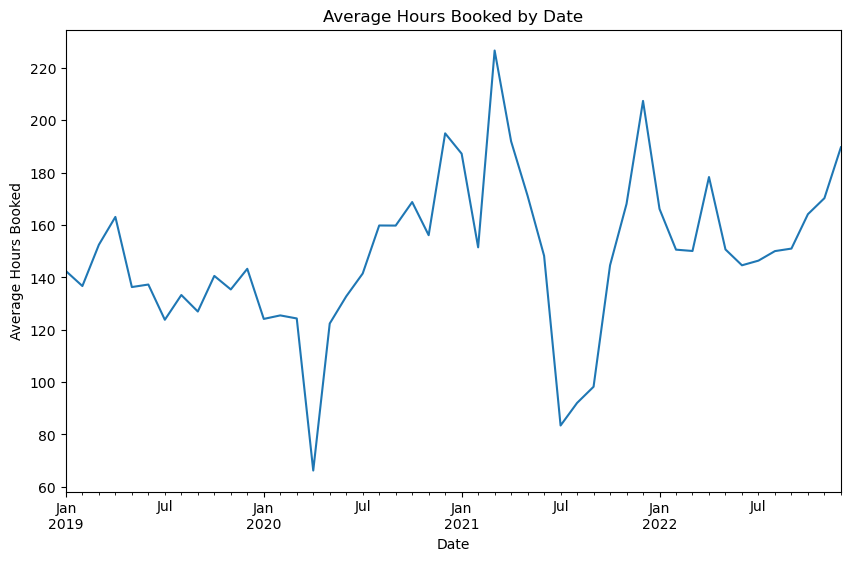

In [55]:
# Display the initial rows of data to verify
print(df.head())

# Checking if the 'Date' column is properly formatted and if 'Hours_Booked' contains valid data
print(df.dtypes)
print(df['Hours_Booked'].isnull().sum())

# Group by 'Date' and calculate the average 'Hours_Booked'
grouped_data = df.groupby('Date').mean(numeric_only=True)['Hours_Booked']

# Displaying the grouped data to check
print(grouped_data.head())

# Plotting the graph of Date against Average Hours Booked
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='line')
plt.title('Average Hours Booked by Date')
plt.xlabel('Date')
plt.ylabel('Average Hours Booked')
plt.show()

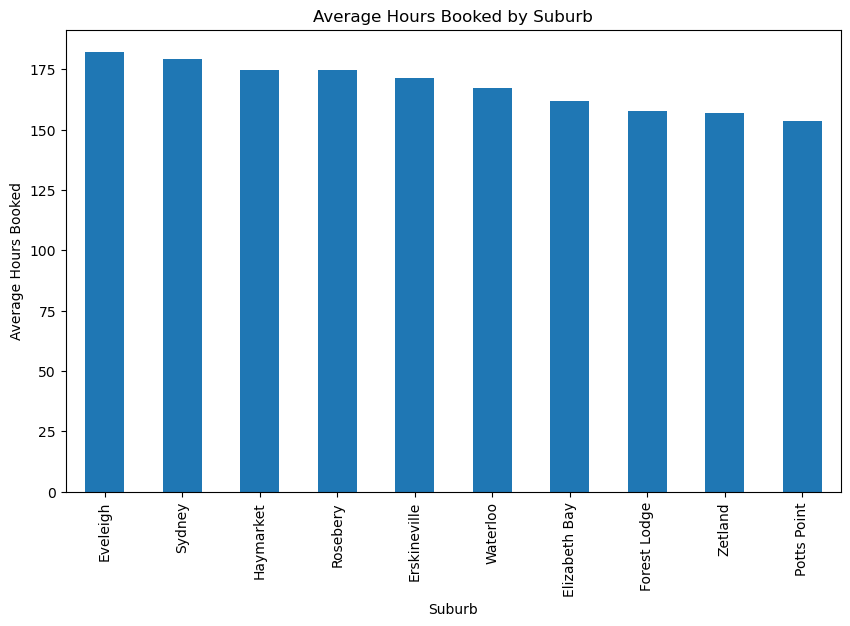

In [57]:
# Group by 'Suburb' and calculate the average hours booked
# Plotting the graph of Suburb against Average Hours Booked
plt.figure(figsize=(10, 6))
df.groupby('Suburb').mean(numeric_only=True)['Hours_Booked'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Hours Booked by Suburb')
plt.xlabel('Suburb')
plt.ylabel('Average Hours Booked')
plt.show()

<Figure size 1000x600 with 0 Axes>

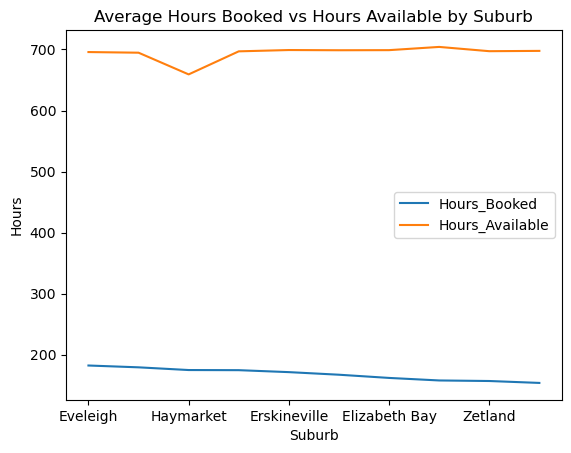

In [59]:
# Compareing by plotting Hours_Booked and Hours_Available by Suburb
plt.figure(figsize=(10, 6))
df.groupby('Suburb')[['Hours_Booked', 'Hours_Available']].mean(numeric_only=True).sort_values(by='Hours_Booked', ascending=False).head(10).plot(kind='line')
plt.title('Average Hours Booked vs Hours Available by Suburb')
plt.xlabel('Suburb')
plt.ylabel('Hours')
plt.show()